
# 📊 Estatística - Revisão Rápida

Este notebook faz parte do meu **plano de estudos em IA/ML**.  
Aqui vou revisar conceitos básicos de **estatística**, aplicando-os em Python.



## 1. Medidas de Tendência Central

- **Média**: soma dos valores dividido pela quantidade  
- **Mediana**: valor central (ou média dos dois centrais)  
- **Moda**: valor mais frequente  

🔑 Uso:
- Média é boa para dados simétricos, mas sensível a outliers.  
- Mediana é robusta contra outliers.  
- Moda é útil para variáveis categóricas.


In [1]:

import numpy as np
from scipy import stats

data = [2, 3, 5, 5, 6, 7, 10]

mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data, keepdims=True)

print("Média:", mean)
print("Mediana:", median)
print("Moda:", mode.mode[0], " (aparece", mode.count[0], "vezes)")


Média: 5.428571428571429
Mediana: 5.0
Moda: 5  (aparece 2 vezes)



## 2. Medidas de Dispersão

- **Amplitude** = máx - mín  
- **Variância** = média dos desvios quadráticos  
- **Desvio padrão** = raiz quadrada da variância  

⚠️ Importante:  
- `np.var(data)` → variância **populacional**  
- `np.var(data, ddof=1)` → variância **amostral**


In [3]:

amplitude = np.max(data) - np.min(data)
var_pop = np.var(data)
var_sample = np.var(data, ddof=1)
std_pop = np.std(data)
std_sample = np.std(data, ddof=1)

print("Amplitude:", amplitude)
print("Variância populacional:", var_pop)
print("Variância amostral:", var_sample)
print("Desvio padrão populacional:", std_pop)
print("Desvio padrão amostral:", std_sample)


Amplitude: 8
Variância populacional: 5.959183673469389
Variância amostral: 6.952380952380953
Desvio padrão populacional: 2.4411439272335804
Desvio padrão amostral: 2.63673679998231



## 3. Distribuições de Probabilidade

### Distribuição Normal
Usada para modelar muitos fenômenos naturais.  

### Distribuição Binomial
Modela número de sucessos em ensaios independentes com 2 resultados possíveis.  

### Distribuição Uniforme
Todos os valores têm a mesma probabilidade de ocorrer.


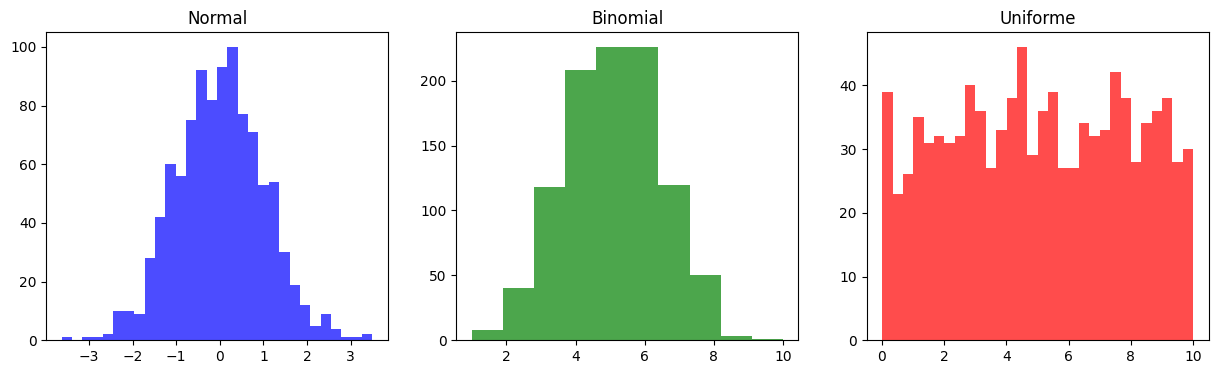

In [9]:

import matplotlib.pyplot as plt

# Normal
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Binomial
binomial_data = np.random.binomial(n=10, p=0.5, size=1000)

# Uniforme
uniform_data = np.random.uniform(low=0, high=10, size=1000)

fig, axs = plt.subplots(1, 3, figsize=(15,4))

axs[0].hist(normal_data, bins=30, alpha=0.7, color='blue')
axs[0].set_title("Normal")

axs[1].hist(binomial_data, bins=10, alpha=0.7, color='green')
axs[1].set_title("Binomial")

axs[2].hist(uniform_data, bins=30, alpha=0.7, color='red')
axs[2].set_title("Uniforme")

plt.show()



## 4. Probabilidade Básica

- **Regra da soma**: P(A ou B) = P(A) + P(B) (se mutuamente exclusivos)  
- **Regra do produto**: P(A e B) = P(A) * P(B) (se independentes)  
- **Probabilidade condicional**: P(A|B) = P(A e B) / P(B)


In [5]:

# Exemplo: probabilidade condicional
# Dado que temos um baralho com 52 cartas:
# P(A) = probabilidade de sair Ás = 4/52
# P(carta vermelha) = 26/52
# P(Ás e vermelho) = 2/52

p_ace = 4/52
p_red = 26/52
p_ace_and_red = 2/52

p_ace_given_red = p_ace_and_red / p_red

print("P(Ás):", p_ace)
print("P(Carta vermelha):", p_red)
print("P(Ás vermelho):", p_ace_and_red)
print("P(Ás | Vermelha):", p_ace_given_red)


P(Ás): 0.07692307692307693
P(Carta vermelha): 0.5
P(Ás vermelho): 0.038461538461538464
P(Ás | Vermelha): 0.07692307692307693



## 5. Visualização Exploratória

- **Histogramas** → distribuição de frequências  
- **Boxplots** → mediana, quartis e outliers


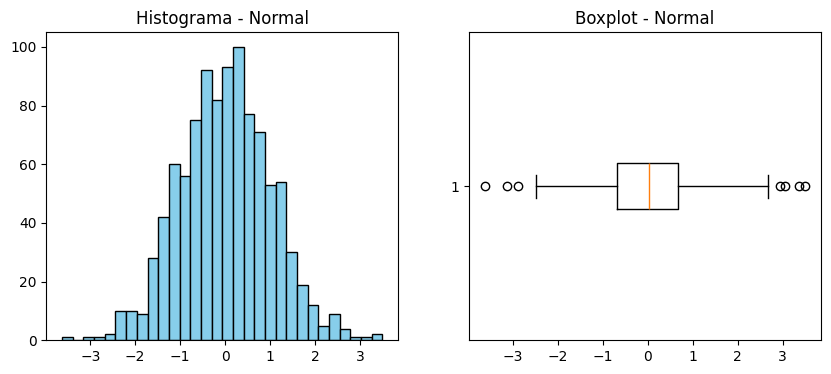

In [11]:

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(normal_data, bins=30, color="skyblue", edgecolor="black")
plt.title("Histograma - Normal")

plt.subplot(1,2,2)
plt.boxplot(normal_data, vert=False)
plt.title("Boxplot - Normal")

plt.show()


In [12]:
amplitude = np.max(normal_data) - np.min(normal_data)
var_pop = np.var(normal_data)
var_sample = np.var(normal_data, ddof=1)
std_pop = np.std(normal_data)
std_sample = np.std(normal_data, ddof=1)

print("Max:", np.max(normal_data))
print("Min:", np.min(normal_data))
print("Amplitude:", amplitude)
print("Variância populacional:", var_pop)
print("Variância amostral:", var_sample)
print("Desvio padrão populacional:", std_pop)
print("Desvio padrão amostral:", std_sample)

Max: 3.501521211459114
Min: -3.6267571643473757
Amplitude: 7.12827837580649
Variância populacional: 1.0108627683223146
Variância amostral: 1.0118746429652798
Desvio padrão populacional: 1.0054167137671397
Desvio padrão amostral: 1.0059197994697588



## 6. Covariância e Correlação
- **Covariância** → mede se duas variáveis variam juntas.
    - **Positiva**: crescem juntas.
    - **Negativa**: uma cresce enquanto a outra diminui.
    - **Zero**: não há relação linear clara.
- **Correlação (ρ)** → versão normalizada da covariância, varia entre -1 e 1.
    - ρ ≈ 1 → relação linear forte positiva.
    - ρ ≈ -1 → relação linear forte negativa.
    - ρ ≈ 0 → pouca ou nenhuma relação linear.

In [16]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
z = [9, 7, 5, 3, 1]

print("Covariância X e Y:\n", np.cov(x, y))
print("Covariância X e Z:\n", np.cov(x, z))
print("Corelação X e Y:\n", np.corrcoef(x, y))
print("Corelação X e Z:\n", np.corrcoef(x, z))

Covariância X e Y:
 [[ 2.5  5. ]
 [ 5.  10. ]]
Covariância X e Z:
 [[ 2.5 -5. ]
 [-5.  10. ]]
Corelação X e Y:
 [[1. 1.]
 [1. 1.]]
Corelação X e Z:
 [[ 1. -1.]
 [-1.  1.]]
